In [5]:
import statsmodels.api as sm
import numpy as np
predictors = np.random.random(1000).reshape(500,2) #случайный массив 500х2
target = predictors.dot(np.array([0.4,0.6]))+np.random.random(500) 
lmRegModel = sm.OLS(target,predictors)
result = lmRegModel.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     2196.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):          9.37e-248
Time:                        15:32:03   Log-Likelihood:                -174.18
No. Observations:                 500   AIC:                             352.4
Df Residuals:                     498   BIC:                             360.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8232      0.040     20.595      0.000       0.745       0.902
x2             1.0595      0.039     26.983      0.000       0.982       1.137
==============================================================================
Omnibus:                       18.645   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.690
Skew:                          -0.013   Prob(JB):                       0.0130
Kurtosis:                       2.355   Cond. No.                         2.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from sklearn import neighbors
predictors = np.random.random(1000).reshape(500,2)
target = np.around(predictors.dot(np.array([0.4,0.6]))+np.random.random(500))
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
knn = clf.fit(predictors, target)
knn.score(predictors, target)

0.826

In [11]:
from sklearn.metrics import confusion_matrix
prediction = knn.predict(predictors)
confusion_matrix(target,prediction)

array([[  9,  27,   0],
       [  9, 398,   4],
       [  0,  47,   6]], dtype=int64)

Главная диагональ показывает , сколько случаев было спрогнозировано правильно.(Столбец - прогнозируемое значение , строка - прогноз , фактическое значение)

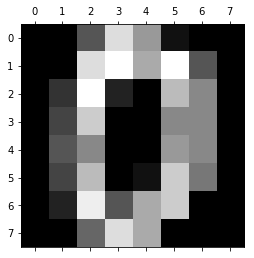

In [6]:
from sklearn.datasets import load_digits
import pylab as pl
digits = load_digits()
pl.gray()
pl.matshow(digits.images[0])
pl.show()

In [2]:
digits.images[0] #Оттенки серого

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

y = digits.target

n_samples = len(digits.images)
X = digits.images.reshape((n_samples,-1)) #n_samples vectorov 
#print X

X_train, X_test , y_train , y_test = train_test_split(X,y,random_state=0)
gnb = GaussianNB()
fit = gnb.fit(X_train,y_train)
predicted = fit.predict(X_test)
confusion_matrix(y_test, predicted)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]], dtype=int64)

Матрица несоответствий прогнозов , какое число представленно на нечетком изображении.(Столбец - прогнозируемое значение , строка - прогноз , фактическое значение)

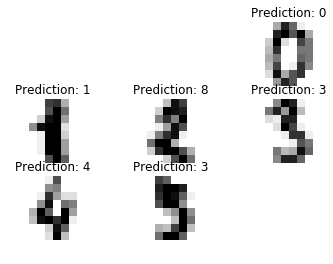

In [46]:
images_and_predictions = list(zip(digits.images, fit.predict(X)))
for index, (image,prediction) in enumerate(images_and_predictions[:6]):#первые 7
    plt.subplot(3,3,index+3)#3х3 матрица с отступом 
    plt.axis('off')#сетка
    plt.imshow(image,cmap=plt.cm.gray_r)#Серый цвет
    plt.title('Prediction: %i'%prediction)
plt.show();#отображение 7 графиков

Вся учебная выборка имеет один размер и содержит 16 оттенков серого , расширив задачу до переменного размера изображений со строками переменной длины и переменным количеством оттенков серого с алфавитно-цифровыми символами на контрольных изображениях , и становится понятно , почему достаточно точной модели для распознавания контрольных изображений еще не существует.

# Неконтролируемое обучение
Выявление скрытых переменных в наборе данных качества вина

In [2]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import pylab as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url,sep=";")
X=data[[u"fixed acidity",u"volatile acidity",
        u"citric acid",u"residual sugar",u"chlorides",u"free sulfur dioxide",
        u"total sulfur dioxide",u"density",u"pH",u"sulphates",u"alcohol"]]
y=data.quality #целевая переменная качество из csv
X=preprocessing.StandardScaler().fit(X).transform(X)#стандартизация данных

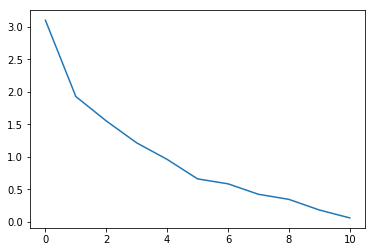

In [3]:
model = PCA()
results = model.fit(X)#Поиск возможной свертки
Z=results.transform(X)#Преобразование в массив для использования в дальнейшем
plt.plot(results.explained_variance_)#график каменистой осыпи
plt.show()

График каменистой осыпи PCA демонстрирует предельную величину информации , которую создает каждая новая переменная. Первые переменные объясняют приблизительно 28% информации , 2 добавляет еще 17 , третья 15 и т д. 5 скрытых переменных дают нам 77% информации.


In [13]:
model = PCA(n_components = 5)
results = model.fit(X)#Поиск возможной свертки
#Вывод компонент PCA во фрейме данных Pandas
pd.DataFrame(results.components_,columns=list([u"fixed acidity",u"volatile acidity",
        u"citric acid",u"residual sugar",u"chlorides",u"free sulfur dioxide",
        u"total sulfur dioxide",u"density",u"pH",u"sulphates",u"alcohol"]))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681


Строки полученной таблицы описывают математическую корреляцию , первая скрытая переменная , отображающая примерно 28 процентов информации в наборе , вычисляется по следующей формуле.

hiden_var_1 = (fixed acidity*0.489314)+(volatile acidity*-0.238584)+(citric acid*0.463632)...+(alcohol*-0.113232)

Назначить разумное имя каждой новой переменной достаточно сложная задача , часто требуется консультация эксперта в изучаемой области.

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt
#Прогнозирование качества вина до применения анализа главных компонент
gnb = GaussianNB()
fit = gnb.fit(X,y)#Подгонка данных
pred = fit.predict(X)#Прогнозирование для неизвестных данных
print(confusion_matrix(pred,y))

print('Правильно классифицированных случаев : ',confusion_matrix(pred,y).trace(),' из ',len(y))

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'X' is not defined

In [1]:
predicted_correct = [] #Массив будет наполняться спрогнозированными компонентами
for i in range(1,10):
    model = PCA(n_components = i)
    results = model.fit(X)
    Z = results.transform(X)#проецирует Z на X
    fit = gnb.fit(Z,y)
    pred = fit.predict(Z)
    predicted_correct.append(confusion_matrix(pred,y).trace())
    print('Правильно классифицированных случаев : ',confusion_matrix(pred,y).trace(),' из ',len(y),' при ',i)
plt.plot(predicted_correct)
plt.show();

NameError: name 'PCA' is not defined

Из графика видно , что добавление новых скрытых переменных в модель до определенного момента сильно повышает прогностическую способность(У) , но потом прирост замедляется. Из графика видно , что всего с 3 скрытыми переменными классификатор лучше справляется с прогнозированием качества вина , чем с 11 исходными.(Так же , что добавление скрытых переменных свыше 5 не увеличивает прогностическую спобность в такой мере , как первые 5. Это показывает , что выбор 5 скрытых переменных как порог отсечения был удачным.)

# Кластеризация
В этом примере будет использоваться алгоритм k-средних , этот алгоритм хорошо дает общее представление о данных , однако он чувствителен к начальным значениям , поэтому при каждом выполнении алгоритма вы можете получать разные кластеры , если только начальные значения не будут задаваться вручную посредством определения затравки(константы для генератора начальных значений).Другой недостаток - необходимость задавать количество кластеров заранее. Часто это приводит к серии проб и ошибок.

In [4]:
import sklearn
from sklearn.datasets import load_iris
from sklearn import cluster
import pandas as pd

#type bunch(super dictionary (as JSON in jscript))
data = load_iris()# .data - array data  .target .target_names .feature_names
data??
X=pd.DataFrame(data.data, columns = list(data.feature_names))
model = cluster.KMeans(n_clusters=3, random_state=25)#количество кластеров
results = model.fit(X)
X["cluster"] = results.predict(X)
X["target"]=data.target
X["C"] = "null"
print(X[:5])
classification_result = X[["cluster","target","C"]].groupby(["cluster","target"]).agg("count")
#Сначала выбираем столбцы ["cluster","target","C"] и после группируем по столбцам ["cluster","target"]
#и строка группы вычисляется подсчетом
print(classification_result)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  target     C  
0        0       0  null  
1        0       0  null  
2        0       0  null  
3        0       0  null  
4        0       0  null  
                 C
cluster target    
0       0       50
1       1       48
        2       14
2       1        2
        2       36


Матрица представляющая этот результат классификации , позволяет увидеть , насколько успешно прошла кластеризация . Для кластера 0 всё прошло идеально . В кластерах 1 и 2 встречается небольшая путаница , но в общем мы получаем всего 16(14+2) неверных классификаций из 150.

# Итоги

<b>Процесс моделирования состоит из 4 фаз:</b>

1)Планирование показателей , подготовка данных и параметризация модели - вы определяете входные параметры\\ и переменные для своей модели.

2)Тренировка модели - модель получает данные и изучает закономерности , скрытые в данных.

3)Выбор и проверка адекватности модели - модель может работать хорошо или плохо; на основании её эффективности выбирается модель , которая дает самый практичный результат.

4)Применение тренировочной модели к незнакомым данным - убедившись в том , что модель надежна , вы передаете ей новые данные. 
Если работа была выполнена качественно, модель сообщает допольнительную информацию или дает хороший прогноз того , что ждет вас в будущем.


<b>Две основные разновидности методов машинного обучения:</b>

1) Контролируемые - методы обучения , требующие помеченных данных.

2) Неконтролируемые - методы обучения , не требующие помеченных данных , но обычно менее точные или надежные , чем контролируемые


Частично контролируемые методы занимают промежуточное положение и используются в тех случаях , когда помечена только небольшая часть данных.



In [1]:
#Наивный байесовский классификатор BC
# Анализ первичных компонент PCA

# INTRODUCTION TO NEURAL NETWORK
Рассмотрим нейрон , он бинарен , на выход дает да, если общее значение на вход от всех больше порогового значения , при этом все остальные нейроны воспринимаются одинаково
[title](nn1.png)
Но что делать если мы считаем некоторые нейроны , например ответственные за визуализацию более важными , нам нужно добавить к ним веса.(Скалярное произведение векторов весов*сингал )
[title](nn2.png)
Но если нам нужно использовать не только да и нет , то нам нужно заменить пороговое значение на что то более интересное(На функцию , кои называются сигмоиды)
[title](nn3.png)
w-вес , b - смещение
<p>Подбор весов для алгебры логики
<p>Конъюнкция 
   $y=x_1*x_2$ 
    <p>       $y=\sigma(w_1x_1+w_2x_2+b)>0$
    <p> Подбирая , мы получаем : $y=\sigma(Ax_1+Ax_2-A)>0$
<p>Дизъюнкция
   $y=x_1+x_2$ 
    <p>       $y=\sigma(w_1x_1+w_2x_2+b)>0$
    <p> Подбирая , мы получаем : $y=\sigma(Ax_1+Ax_2-A/2)>0$
<p>XOR
   $y=x_1 XOR x_2 = (X_1+X_2)*(!X_1+X_2!)$(Либо хотя бы одна еденица , и исключаем когда обе единицы)
    <p>     
    Нам неудастся расписать XOR как один нейрон
    <p>Нам придется использовать 2 предыдущих нейрона(2 дизъюнкии, объединенные в конъюнкцию)
        Задача нейронного обучения в апроксимации , нахождении таких весов , чтобы возможно было приблизиться к любой хорошей функции
</p>
[title](nn4.png)  
[title](nn5.png)  
[title](nn6.png)  
[title](nn7.png)  
Отличная визуализация http://neuralnetworksanddeeplearning.com/chap4.html

Обучить нейронную сеть - подобрать значения всех настраиваемыхпараметров (веса и смещения).
<p>Два этапа:</p>
    1)Задать функцию потерь $\digamma$
    <p>
    2)Подобрать веса, минимизирующие$\digamma$
[title](nn8.png)

# Работа с большими данными на одном компьютере
Основные проблемы
1)Нехватка памяти
2)Процессы , которые не завершаются
3)Одни компоненты простаивают , другия становятся узким местом
4)Недостаточная скорость

Если сокращать переменные , как это делается в PCA , то мы сократим объем информации , но увеличим работу процессора. 
<p><b>Решения:</b>
1)Правильный выбор алгоритмов
    <p>*Онлайновые алгоритмы(использовал и забыл)
        Рассмотрим Тренировку перцептрона
    
    

In [50]:
import numpy as np
class perceptron():
    def __init__(self,X,y,treshold = 0.5,
                learning_rate=0.1,max_epochs = 10):
        self.treshold=treshold
        self.learning_rate=learning_rate
        self.X=X
        self.y=y
        self.max_epochs=max_epochs
    #Каждому наблюдению будет назначен вес для всех входящих наблюдений.
    #Либо все веса 0 , либо небольшие случайные значения
    def initialize(self,init_type = 'zeros'):
        if init_type=='random':
            self.weights = np.random.rand(len(self.X[0]))*0.05
        if init_type=='zeros':
            self.weights = np.zeros(len(self.X[0]))
    #Функция тренировки , данные перебираются и передаются в метод train_observation
    #А он в свою очередь меняет веса , до тех пор пока количество ошибок не будет 0
    def train(self):
        epoch=0
        while True:
            error_count = 0
            epoch+=1
            for(X,y) in zip(self.X, self.y):
                error_count +=self.train_observation(X,y,error_count)#По одному наблюдению за раз
                
            if error_count==0:
                print("training successful")
                break
            if epoch >= self.max_epochs:
                print("reached max epochs , no perfect prediction")
                break
    #Надо понимать , что X коэфициенты уравнения , а y их target (целевое)
    def train_observation(self,X,y, error_count):
        #Подставляем в наше уравнение веса.1 проход: X=(1,0,0)<=>ax1 , a = 0 , получаем 0
        #И округляем наше значение до 0 или 1
        result = np.dot(X,self.weights)>self.treshold
        
        error = y - result #Если получившийся и ожидаемый результат сошелся идем далее
        # -1 мы под графиком , 1 на графике , 0 достаточно близко к графику
        if error!=0:
            error_count+=1
            for index, value in enumerate(X):
                self.weights[index]+=self.learning_rate*error*value# -+0.1 Если не дотягиваем то +0.1 , если перелетаем , то -0.1
                #Веса меняются в зависимости от значения матрицы XX
        return error_count
    
    def predict(self, X):
        return int(np.dot(X, self.weights) > self.treshold)
    def print(self):
        print(self.weights)

In [54]:
X = [(1,0,0),(1,1,0),(1,1,1),(1,1,1),(1,0,1),(1,0,1)]
y = [1,1,0,0,1,1]

p = perceptron(X,y)
p.initialize()
p.train()
print(p.predict((1,1,1)))
p.print();

training successful
0
[ 0.8 -0.2 -0.1]


# Разбиение большой матрицы на несколько меньших
$A+B = [A_1/A_2]+[B_1/B_2]$
<p>bcolz - библиотека , обеспечивающая компакное хранение массивов данных и использует жесткий диск , если данные не помещаются в основной памяти
<p>Dask - библиотека ,позволяющая оптимизировать последовотельность вычислений и упрощает их реализацию . Dask may not be included in standard package.

In [31]:
import dask.array as da
import bcolz as bc
import numpy as np
import dask

n = int(1e4)#10.000
#numpy-расширение массива , которое может выгружаться на диск , данные в нем хранятся в сжатом виде 
ar = bc.carray(np.arange(n).reshape(n//2,2), dtype ='float64', rootdir = 'ar.bcolz', mode = 'w')#ar.bcolz назвние папки
y = bc.carray(np.arange(n//2).reshape(n//2,1), dtype ='float64', rootdir = 'yy.bcolz', mode = 'w')

dax = da.from_array(ar, chunks=(5,5))#Создаются блочные матрицы для свободных ar и y переменных.
##
dy = da.from_array(y, chunks=(5,5))#from_array считывает данные с озу или с жеского
#каждый блок 5х5 , кроме того когда меньше 5 данных
XTX = dax.T.dot(dax)#ТХТ - произедение матрицы на её транспонированную версию
Xy = dax.T.dot(dy)#Матрицы только определены , но еще не вычисляются

coefficients = np.linalg.inv(XTX.compute()).dot(Xy.compute())
coef = da.from_array(coefficients, chunks=(5,5))

ar.flush()
y.flush()

predictions = dax.dot(coef).compute()
print(predictions)

[[  0.00000000e+00]
 [  1.00000001e+00]
 [  2.00000003e+00]
 ..., 
 [  4.99700007e+03]
 [  4.99800007e+03]
 [  4.99900007e+03]]
